In [2]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import numpy as np
import tensorflow as tf
import os
import zipfile
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
from six.moves import range
from bs4 import BeautifulSoup
from sklearn.linear_model import LogisticRegression
from datetime import datetime
import time
import pandas as pd
import matplotlib.pyplot as plt

url = 'http://www1.caixa.gov.br/loterias/_arquivos/loterias/'

def maybe_download(filename, expected_bytes):
  """Download a file if not present, and make sure it's the right size."""
  if not os.path.exists(filename):
    filename, a = urlretrieve(url + filename, filename)
  statinfo = os.stat(filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified %s' % filename)
  else:
    print(statinfo.st_size)
    raise Exception(
      'Failed to verify ' + filename + '. Can you get to it with a browser?')
  return filename

filename = maybe_download('D_megase.zip', 115492)

def read_data(filename):
  """Extract the first file enclosed in a zip file as a list of words"""
  with zipfile.ZipFile(filename) as f:
    data = f.read(f.namelist()[0])
    
    soup = BeautifulSoup(data, "html.parser")
    table = soup.find("table")

    # The first tr contains the field names.
    headings = [th.get_text() for th in table.find("tr").find_all("th")]

    datasets = []
    for row in table.find_all("tr")[1:]:
        dataset = [td.get_text() for td in row.find_all("td")]
        datasets.append(dataset)
        
  return datasets
  
sorteios = read_data(filename)
print('Data size %d' % len(sorteios))

Found and verified D_megase.zip
Data size 2055


In [6]:
sorteios_df = pd.DataFrame(sorteios, columns=['concurso','data_sorteio','dezena_1','dezena_2','dezena_3','dezena_4','dezena_5','dezena_6','arrecadacao_total','ganhadores_sena','cidade','uf','rateio_sena','ganhadores_quina','rateio_quina','ganhadores_quadra','rateio_quadra','acumulado','valor_acumulado','estimativa_premio','acumulado_mega_virada'])
sorteios_df_notnull = sorteios_df[sorteios_df['dezena_1'].notnull()].convert_objects(convert_numeric=True)
sorteios_df_notnull['data_sorteio'] = pd.to_datetime(sorteios_df_notnull['data_sorteio'])
sorteios_df_notnull.info()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1875 entries, 0 to 2054
Data columns (total 21 columns):
concurso                 1875 non-null int64
data_sorteio             1875 non-null datetime64[ns]
dezena_1                 1875 non-null int64
dezena_2                 1875 non-null int64
dezena_3                 1875 non-null int64
dezena_4                 1875 non-null int64
dezena_5                 1875 non-null int64
dezena_6                 1875 non-null int64
arrecadacao_total        1875 non-null object
ganhadores_sena          1875 non-null int64
cidade                   1875 non-null object
uf                       1875 non-null object
rateio_sena              1875 non-null object
ganhadores_quina         1875 non-null int64
rateio_quina             1875 non-null object
ganhadores_quadra        1875 non-null int64
rateio_quadra            1875 non-null object
acumulado                1875 non-null object
valor_acumulado          1875 non-null object
estimativa_premio    

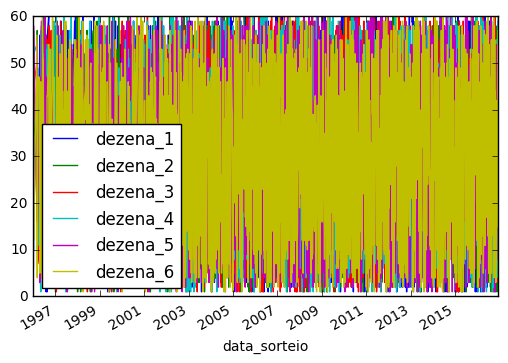

In [7]:
%matplotlib inline
sorteios_df_notnull.plot(x='data_sorteio',y=['dezena_1','dezena_2','dezena_3','dezena_4','dezena_5','dezena_6'])

27.166666666666668

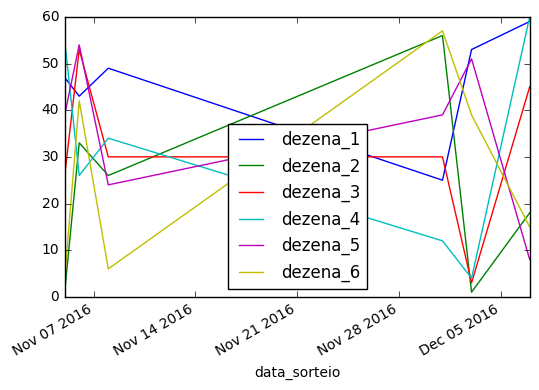

In [29]:
sorteios_2015 = sorteios_df_notnull[sorteios_df_notnull['data_sorteio'] > pd.to_datetime('2016-11')]

sorteios_2015.plot(x='data_sorteio',y=['dezena_1','dezena_2','dezena_3','dezena_4','dezena_5','dezena_6'])

sorteios_2015['dezena_6'].mean()